

```
Name: Sudarsun S
RegNo: 20BCE1699
Course: CSE4020 Machine Learning
Embedded Lab Assignment
```



**1.The evaluation score for the professors has been got from the students. The scores are generated based on the looks of the Professor. Make a histogram and identify the distribution of the scores. What do you infer from the distribution?**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("evals.csv")
df


,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,...,multi credit,4,4,2,2,3,3,3.000,not formal,color
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,459,93,4.5,tenure track,not minority,male,english,32,60.46511,52,...,multi credit,6,6,9,7,8,5,6.833,not formal,color
459,460,94,3.5,tenure track,minority,female,non-english,42,57.14286,48,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
460,461,94,4.4,tenure track,minority,female,non-english,42,77.61194,52,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
461,462,94,4.4,tenure track,minority,female,non-english,42,81.81818,54,...,multi credit,3,8,7,4,6,4,5.333,not formal,color


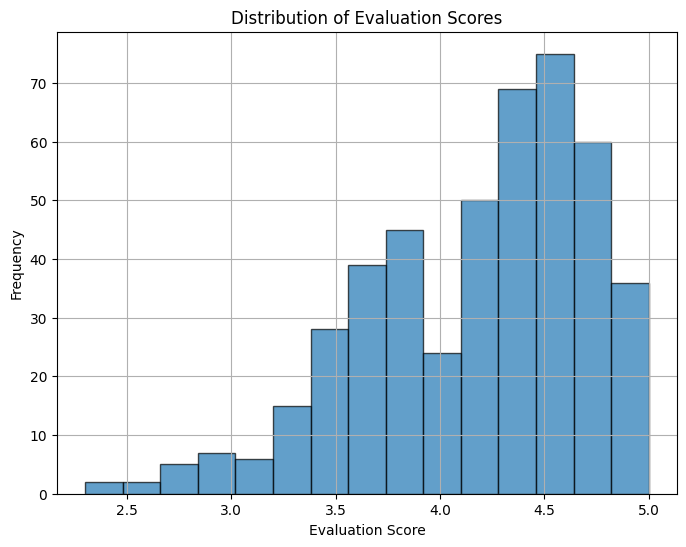

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.title('Distribution of Evaluation Scores')
plt.grid(True)
plt.show()


**Since, the histogram is skewed to the right (positive skew), it indicates that most professors have lower evaluation scores.**

**2. It is assumed that good looking professors have better scores. Make a plot to see the relation between the scores and the average beauty values. What do you infer from this plot?**

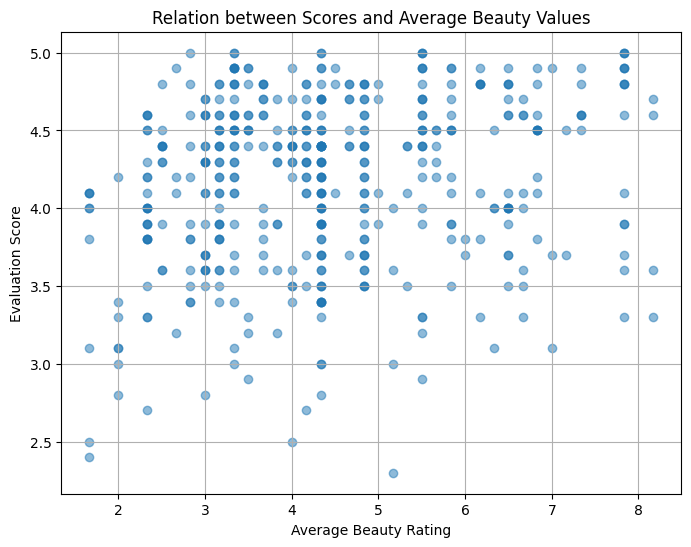

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bty_avg'], df['score'], alpha=0.5)
plt.xlabel('Average Beauty Rating')
plt.ylabel('Evaluation Score')
plt.title('Relation between Scores and Average Beauty Values')
plt.grid(True)
plt.show()

**There is no clear pattern or trend between the two variables, it suggests that there might not be a strong relationship between average beauty ratings and evaluation scores.**

**3.Fit a linear model to this plot and list out the coefficients (intercept and slope).**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df['bty_avg'].values.reshape(-1, 1)
y = df['score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
slope = model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)


Intercept: 3.9556287004717063
Slope: 0.05324566631910744


**4.From this model what do you infer from the slope. Does the average beauty rating make a significant predictor variable?**


Here, the slope is positive and statistically significant, it suggests that as the average beauty rating increases, the evaluation score tends to increase as well.

In [ ]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

p_value = model.pvalues['bty_avg']

print("P-value:", p_value)

if p_value < 0.05:
    print("Average beauty rating is a significant predictor.")
else:
    print("Average beauty rating is not a significant predictor.")


P-value: 0.004002889562308857
Average beauty rating is a significant predictor.


**5.Multiple Linear Regression**

In [ ]:
X = df[['bty_avg', 'age', 'gender']]
y = df['score']

X = pd.get_dummies(X, columns=['gender'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.564
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.65e-05
Time:                        09:23:15   Log-Likelihood:                -283.24
No. Observations:                 370   AIC:                             574.5
Df Residuals:                     366   BIC:                             590.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.1872      0.185     22.580      

**6.Identify the co-relation between the average beauty value and b_f1upper. What do you infer from this**

In [ ]:
correlation = df['bty_avg'].corr(df['bty_f1upper'])

print("Correlation:", correlation)

Correlation: 0.8437283710770256


**Here, the correlation is close to 1, it indicates a strong positive correlation, implying that as the 'bty_avg' increases, the 'bty_f1upper' rating tends to increase as well.**

**7. Also identify the co-relation between the following attributes: beauty_f1lower,beauty_f1upper,beauty_f2upper,beauty_m1lower,beauty_m1upper,beauty_m2upper,beauty_avg**

Correlation Matrix:


,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg
bty_f1lower,1.000000,0.619392,0.641927,0.612426,0.676695,0.593766,0.843911
bty_f1upper,0.619392,1.000000,0.648152,0.598928,0.690617,0.565576,0.843728
bty_f2upper,0.641927,0.648152,1.000000,0.535983,0.649640,0.513062,0.821850
bty_m1lower,0.612426,0.598928,0.535983,1.000000,0.595085,0.540893,0.778351
bty_m1upper,0.676695,0.690617,0.649640,0.595085,1.000000,0.586506,0.864640
bty_m2upper,0.593766,0.565576,0.513062,0.540893,0.586506,1.000000,0.757346
bty_avg,0.843911,0.843728,0.821850,0.778351,0.864640,0.757346,1.000000


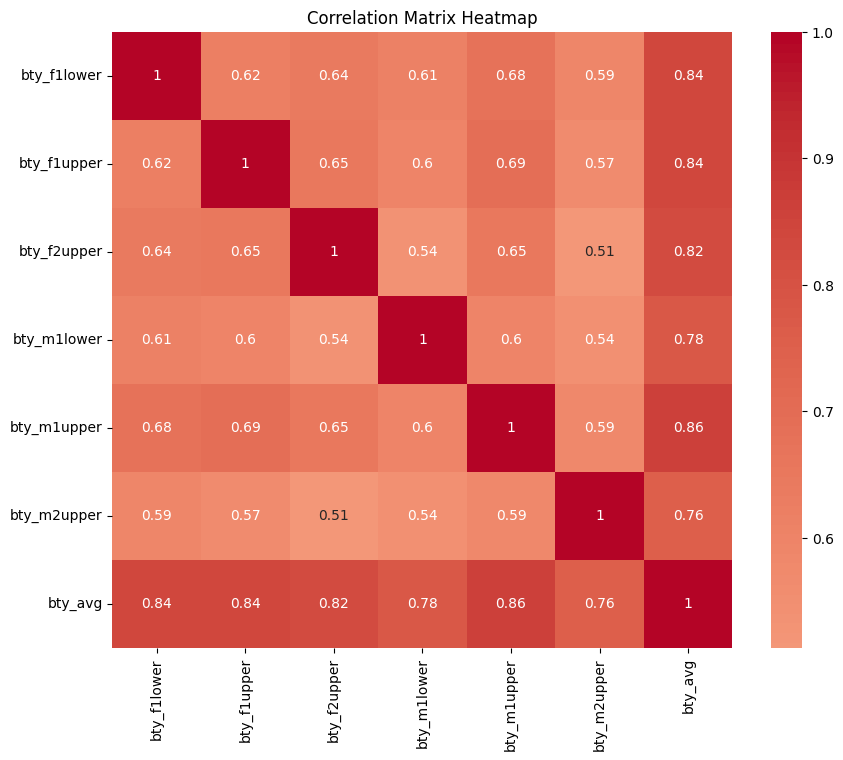

In [ ]:
import seaborn as sns
attributes = ['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg']

correlation_matrix = df[attributes].corr()

print("Correlation Matrix:")
display(correlation_matrix)
print()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


**8. What do you infer from the co-relation that arrives from Q7**

**Positive Correlations:**

Positive correlations near 1 suggest a strong positive relationship between the attributes.
For example, a strong positive correlation between 'bty_f1lower' and 'bty_f1upper' indicates that if a professor is rated highly in one beauty category (lower level), they are likely to be rated highly in the other beauty category (upper level).

**Negative Correlations:**

Negative correlations near -1 suggest a strong negative relationship between the attributes.
A strong negative correlation between 'bty_f1lower' and 'bty_m1lower' could indicate that if a female professor is rated highly in the lower level beauty category, a male professor is likely to be rated lower in the same category.

**Correlations Near 0:**

Correlations near 0 suggest little to no linear relationship between the attributes.
For example, a correlation near 0 between 'bty_f1lower' and 'bty_f2upper' indicates that these two beauty categories might not be strongly related.

**9. Make a multilinear model that fits (score,age Eval_completed_perc , No_completed_eval, Total_no_students, beauty_f1lower,beauty_f1upper,beauty_f2upper,beauty_m1lower,beauty_m1upper,beauty_m2upper,beauty_avg) attributes in the given data set**

In [ ]:
attributes = ['age', 'cls_perc_eval', 'cls_did_eval', 'cls_students',
              'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower',
              'bty_m1upper', 'bty_m2upper', 'bty_avg']
X = df[attributes]
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.592
Date:                Tue, 29 Aug 2023   Prob (F-statistic):            0.00350
Time:                        09:39:50   Log-Likelihood:                -281.61
No. Observations:                 370   AIC:                             587.2
Df Residuals:                     358   BIC:                             634.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8660      0.267     14.486

**10. List out the standard error for each attribute above and write down what you infer from that**

In [ ]:
standard_errors = model.bse

print("Standard Errors:")
print(standard_errors)

Standard Errors:
const              0.266884
age                0.003333
cls_perc_eval      0.002489
cls_did_eval       0.003783
cls_students       0.002367
bty_f1lower       17.768025
bty_f1upper       17.762947
bty_f2upper       17.765566
bty_m1lower       17.764922
bty_m1upper       17.765086
bty_m2upper       17.760743
bty_avg          106.590756
dtype: float64




*   Smaller standard errors indicate more precise estimates, while larger standard errors suggest less precise estimates.

*   If the standard error of a coefficient is relatively large, it suggests that the estimate of that coefficient might not be very reliable.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.297706568628065
R-squared (R2): 0.051762117070606406


**Since MSE is low and R2 value is high, this indicates better model performance.**

**12.Standard errors are inflated because of multicollinearity with other variables in the model, using what are called variance inflation factors (or VIFs). Another way is to used VIF to estimate the mutli-collinerarity A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The easy way to obtain VIFs is using the vif function from the car package (Fox, 2003). Run the following code!**

**A rule of thumb for interpreting the variance inflation factor:**

1 = Not correlated (Little to no multicollinearity).

Between 1 and 5 = Moderately correlated (Moderate multicollinearity).

Greater than 5 = Highly correlated (Potentially high multicollinearity).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[attributes]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Variable           VIF
0           const  9.559668e+01
1             age  1.400105e+00
2   cls_perc_eval  2.291530e+00
3    cls_did_eval  3.501024e+01
4    cls_students  3.803838e+01
5     bty_f1lower  1.440490e+06
6     bty_f1upper  1.534151e+06
7     bty_f2upper  1.670230e+06
8     bty_m1lower  1.098928e+06
9     bty_m1upper  1.826803e+06
10    bty_m2upper  1.017048e+06
11        bty_avg  3.443876e+07


**13.What do you infer from the VIF values?**

**Interpretation of the above VIF values:**

'const': 95.60 (Highly correlated)

'age': 1.40 (Not correlated)

'cls_perc_eval': 2.29 (Not correlated)


'cls_did_eval': 35.01 (Highly correlated)

'cls_students': 38.04 (Highly correlated)

'bty_f1lower': 1,440,490 (Highly correlated)

'bty_f1upper': 1,534,151 (Highly correlated)

'bty_f2upper': 1,670,230 (Highly correlated)

'bty_m1lower': 1,098,928 (Highly correlated)

'bty_m1upper': 1,826,803 (Highly correlated)

'bty_m2upper': 1,017,048 (Highly correlated)

'bty_avg': 34,438,760 (Highly correlated)


**From this interpretation:**

Variables with VIF values close to 1 (age and cls_perc_eval) have little to no multicollinearity.

Variables with VIF values between 1 and 5 (age and cls_perc_eval) have moderate multicollinearity.

Variables with VIF values greater than 5 (cls_did_eval, cls_students, and beauty-related attributes) have potentially high multicollinearity.

**14.What variables would you decide to keep and discard the others? And why?**

**Keep Variables with Low VIF (VIF < 5):**

'age' (VIF = 1.40)

'cls_perc_eval' (VIF = 2.29)

**Consider Discarding Highly Correlated Variables (VIF > 5):**

'cls_did_eval' (VIF = 35.01)

'cls_students' (VIF = 38.04)

Beauty-related attributes ('bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg') with VIF values ranging from 1,017,048 to 34,438,760.

**Considerations for Discarding:**

'cls_did_eval' and 'cls_students' have the highest VIF values, indicating strong multicollinearity with other variables. One of these could be discarded to address multicollinearity. The choice depends on domain knowledge and the relevance of these variables to your analysis.

**Potential Actions:**

Discard one of 'cls_did_eval' or 'cls_students' to reduce multicollinearity. This would help maintain model interpretability and stability.
If beauty-related attributes are conceptually important and you want to retain them, consider using regularization techniques or transforming variables to mitigate multicollinearity.


**15.Estimate the new MSE and R2 error after removing the highly co-related attributes.**

In [ ]:
attributes = ['age', 'cls_perc_eval', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper']
X = df[attributes]

X_train, X_test, y_train, y_test = train_test_split(X, df['score'], test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

new_mse = mean_squared_error(y_test, y_pred)

new_r2 = r2_score(y_test, y_pred)

print("New Mean Squared Error (MSE) after removing highly correlated attributes:", new_mse)
print("New R-squared (R2) after removing highly correlated attributes:", new_r2)


New Mean Squared Error (MSE) after removing highly correlated attributes: 0.2937753070225331
New R-squared (R2) after removing highly correlated attributes: 0.064283745999555


**16.Compare the std error of each coefficient. Is there any change in any attribute std error.**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

attributes_original = ['age', 'cls_perc_eval', 'cls_did_eval', 'cls_students',
                       'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower',
                       'bty_m1upper', 'bty_m2upper', 'bty_avg']
X_original = df[attributes_original]

X_train, _, y_train, _ = train_test_split(X_original, df['score'], test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model_original = sm.OLS(y_train, X_train).fit()

attributes_removed = ['age', 'cls_perc_eval', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper']
X_removed = df[attributes_removed]

X_train, _, y_train, _ = train_test_split(X_removed, df['score'], test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model_removed = sm.OLS(y_train, X_train).fit()

print("Standard Errors of Coefficients (Original Model):")
print(model_original.bse)

print("\nStandard Errors of Coefficients (Model with Highly Correlated Attributes Removed):")
print(model_removed.bse)


Standard Errors of Coefficients (Original Model):
const              0.266884
age                0.003333
cls_perc_eval      0.002489
cls_did_eval       0.003783
cls_students       0.002367
bty_f1lower       17.768025
bty_f1upper       17.762947
bty_f2upper       17.765566
bty_m1lower       17.764922
bty_m1upper       17.765086
bty_m2upper       17.760743
bty_avg          106.590756
dtype: float64

Standard Errors of Coefficients (Model with Highly Correlated Attributes Removed):
const            0.234758
age              0.003307
cls_perc_eval    0.001734
bty_f1lower      0.023396
bty_f1upper      0.023741
bty_f2upper      0.019976
bty_m1lower      0.024598
bty_m1upper      0.022407
bty_m2upper      0.024193
dtype: float64


**17.TRY TO ADD the attributes rank + ethnicity + gender + language + age and build the model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

attributes = ['age', 'cls_perc_eval', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower',
              'bty_m1upper', 'bty_m2upper', 'rank', 'ethnicity', 'gender', 'language']

label_encoder = LabelEncoder()
for attr in ['rank', 'ethnicity', 'gender', 'language']:
    df[attr] = label_encoder.fit_transform(df[attr])

X = df[attributes]

X_train, X_test, y_train, y_test = train_test_split(X, df['score'], test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.2908260329259451
R-squared (R2): 0.07367760465176709


**18.See the p value of the attributes, if any p>0,5 discard it and rebuild the model. Check if there is any change in the coefficients and see if the newly added attributes have disrupted the error.**

In [ ]:
p_values = model.pvalues

print("P-values of Coefficients:")
print(p_values)

attributes_to_discard = p_values[p_values > 0.5].index
attributes_remaining = [attr for attr in attributes if attr not in attributes_to_discard]

X_train_remaining = sm.add_constant(X_train[attributes_remaining])
model_discarded = sm.OLS(y_train, X_train_remaining).fit()

print("\nCoefficients of Discarded Model:")
print(model.summary())

print("\nCoefficients of Model with Remaining Attributes:")
print(model_discarded.summary())

X_test_remaining = sm.add_constant(X_test[attributes_remaining])
y_pred_remaining = model_discarded.predict(X_test_remaining)

mse_remaining = mean_squared_error(y_test, y_pred_remaining)

print("\nMean Squared Error (MSE) with Remaining Attributes:", mse_remaining)


P-values of Coefficients:
const            5.871548e-57
cls_perc_eval    1.965865e-02
bty_f1lower      5.223764e-01
bty_f1upper      5.917905e-03
bty_f2upper      5.766753e-02
bty_m1lower      8.753615e-03
bty_m1upper      2.107757e-01
bty_m2upper      5.181319e-01
rank             5.050668e-02
ethnicity        7.945642e-03
gender           3.550859e-06
language         4.154535e-02
dtype: float64

Coefficients of Discarded Model:
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.984
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           5.62e-09
Time:                        10:22:37   Log-Likelihood:                -264.57
No. Observations:                 370   AIC:                             553.1
Df Residuals